Training with SGD optimizer...
Training with Momentum optimizer...
Training with RMSprop optimizer...
Training with Adam optimizer...


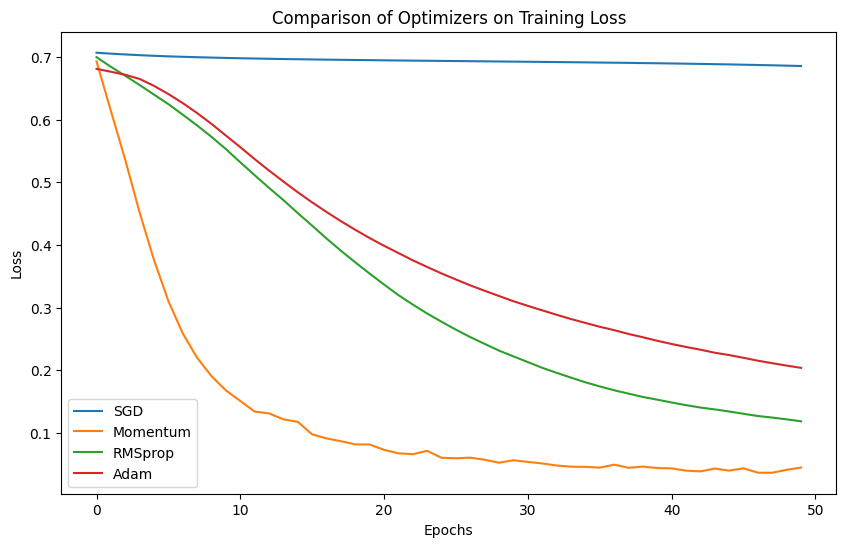

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # Simple decision boundary

# Define a simple neural network model
def create_model(optimizer):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Momentum': tf.keras.optimizers.SGD(momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adam': tf.keras.optimizers.Adam()
}

#SGD : Simple mais lent et bruité
#Momentum : Plus stable et rapide que SGD
#RMSprop : Bon pour réseaux profonds
#Adam : Meilleur choix général 
history_records = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model(opt)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[opt_name] = history

# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_records.items():
    plt.plot(history.history['loss'], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers on Training Loss')
plt.legend()
plt.show()